In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib import pyplot as plt
from fbprophet import Prophet
df=pd.read_csv("/content/sample_data/us-states.csv")

In [ ]:
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
22504,2021-04-15,Virginia,51,641626,10529
22505,2021-04-15,Washington,53,383951,5412
22506,2021-04-15,West Virginia,54,147596,2772
22507,2021-04-15,Wisconsin,55,649388,7406


In [ ]:
df.tail()

,date,state,fips,cases,deaths
22504,2021-04-15,Virginia,51,641626,10529
22505,2021-04-15,Washington,53,383951,5412
22506,2021-04-15,West Virginia,54,147596,2772
22507,2021-04-15,Wisconsin,55,649388,7406
22508,2021-04-15,Wyoming,56,57203,703


In [ ]:
#Current Date
today_date=df[df.date=='2021-04-15']
today_date

,date,state,fips,cases,deaths
22454,2021-04-15,Alabama,1,521201,10736
22455,2021-04-15,Alaska,2,65201,318
22456,2021-04-15,Arizona,4,851737,17123
22457,2021-04-15,Arkansas,5,332949,5686
22458,2021-04-15,California,6,3711581,60770
22459,2021-04-15,Colorado,8,488151,6315
22460,2021-04-15,Connecticut,9,328000,7990
22461,2021-04-15,Delaware,10,99915,1595
22462,2021-04-15,District of Columbia,11,46315,1090
22463,2021-04-15,Florida,12,2148440,34237


In [ ]:
cases_confirmed=today_date.sort_values(by="cases",ascending=False).reset_index()
cases_confirmed=cases_confirmed.iloc[:,1:]
cases_confirmed

,date,state,fips,cases,deaths
0,2021-04-15,California,6,3711581,60770
1,2021-04-15,Texas,48,2844554,49605
2,2021-04-15,Florida,12,2148440,34237
3,2021-04-15,New York,36,1978594,50912
4,2021-04-15,Illinois,17,1296240,23896
5,2021-04-15,Pennsylvania,42,1098619,25623
6,2021-04-15,Georgia,13,1055997,19057
7,2021-04-15,Ohio,39,1048109,18917
8,2021-04-15,New Jersey,34,967401,25034
9,2021-04-15,North Carolina,37,947694,12385


In [ ]:
max_cases_top_countries=cases_confirmed[0:5]

In [ ]:
max_cases_top_countries

,date,state,fips,cases,deaths
0,2021-04-15,California,6,3711581,60770
1,2021-04-15,Texas,48,2844554,49605
2,2021-04-15,Florida,12,2148440,34237
3,2021-04-15,New York,36,1978594,50912
4,2021-04-15,Illinois,17,1296240,23896


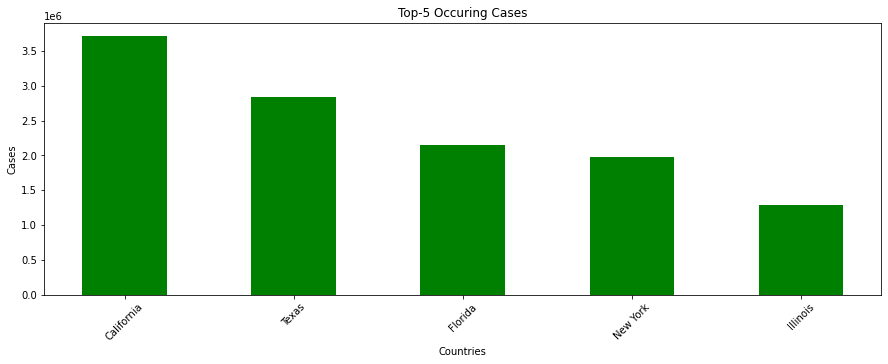

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(max_cases_top_countries["state"],max_cases_top_countries["cases"],width=0.5,color='green')
plt.title('Top-5 Occuring Cases')
plt.xlabel('Countries')
plt.xticks(rotation = 45)
plt.ylabel('Cases')
plt.show()

In [ ]:
Deaths_confirmed=today_date.sort_values(by="deaths",ascending=False).reset_index()
Deaths_confirmed=Deaths_confirmed.iloc[:,1:]


In [ ]:
max_deaths_top_countries=Deaths_confirmed[0:5]
max_deaths_top_countries

,date,state,fips,cases,deaths
0,2021-04-15,California,6,3711581,60770
1,2021-04-15,New York,36,1978594,50912
2,2021-04-15,Texas,48,2844554,49605
3,2021-04-15,Florida,12,2148440,34237
4,2021-04-15,Pennsylvania,42,1098619,25623


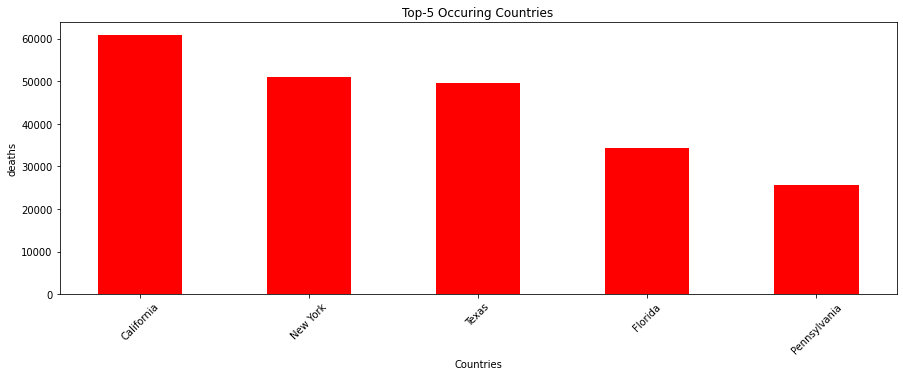

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(max_deaths_top_countries["state"],max_deaths_top_countries["deaths"],width=0.5,color='red')
plt.title('Top-5 Occuring Countries')
plt.xlabel('Countries')
plt.xticks(rotation = 45)
plt.ylabel('deaths')
plt.show()

In [ ]:
#Total Active Cases
Total_cases=df.groupby("state")["cases"].sum().sort_values(ascending=False).to_frame()
Total_cases.style.background_gradient(cmap='Reds')

,cases
state,
California,530445871
Texas,423682689
Florida,330251249
New York,290581544
Illinois,204384870
Georgia,159685143
Ohio,142589428
Pennsylvania,142306544
New Jersey,137669349


In [ ]:
#Total Deaths
Total_deaths=df.groupby("state")["deaths"].sum().sort_values(ascending=False).to_frame()
Total_deaths.style.background_gradient(cmap='Reds')

,deaths
state,
New York,13105210
California,8060458
Texas,7271307
New Jersey,6190577
Florida,5695499
Illinois,4520957
Pennsylvania,4382975
Massachusetts,3852249
Michigan,3519901


In [ ]:
confirmed=df.groupby('date').sum()['cases'].reset_index()
deaths=df.groupby('date').sum()['deaths'].reset_index()

In [ ]:
#Predicting Next 60 days Covid Cases

**Predicting Next 60 days Covid Cases**

In [ ]:
confirmed=df.groupby('date').sum()['cases'].reset_index()
deaths=df.groupby('date').sum()['deaths'].reset_index()

In [ ]:
confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed.tail()

,ds,y
446,2021-04-11,31219720
447,2021-04-12,31292090
448,2021-04-13,31369448
449,2021-04-14,31444724
450,2021-04-15,31519098


In [ ]:
 #Forcasting Confirmed cases using Prohet
 model=Prophet(interval_width=0.95)
 model.fit(confirmed)
 Coming_days=model.make_future_dataframe(periods=60)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
Coming_days.tail()

,ds
506,2021-06-10
507,2021-06-11
508,2021-06-12
509,2021-06-13
510,2021-06-14


In [ ]:
forecast=model.predict(Coming_days)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].round().tail()


,ds,yhat,yhat_lower,yhat_upper
506,2021-06-10,36757809.0,33135275.0,39841909.0
507,2021-06-11,36857338.0,33076121.0,40154337.0
508,2021-06-12,36941475.0,32874291.0,40223956.0
509,2021-06-13,37012063.0,32778679.0,40404147.0
510,2021-06-14,37092899.0,32846016.0,40595033.0


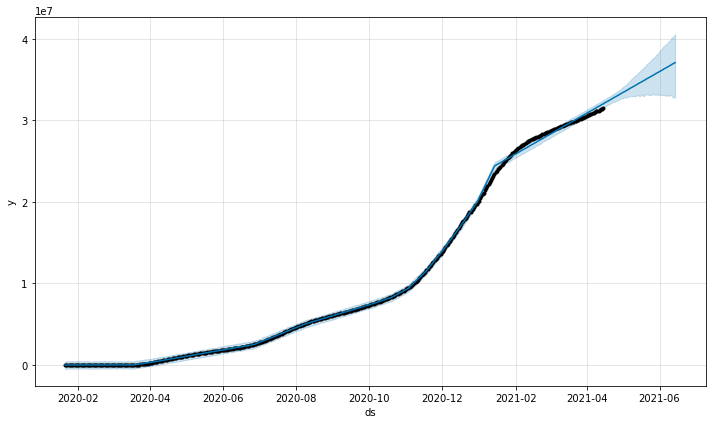

In [ ]:
confirmed_forecast=model.plot(forecast)

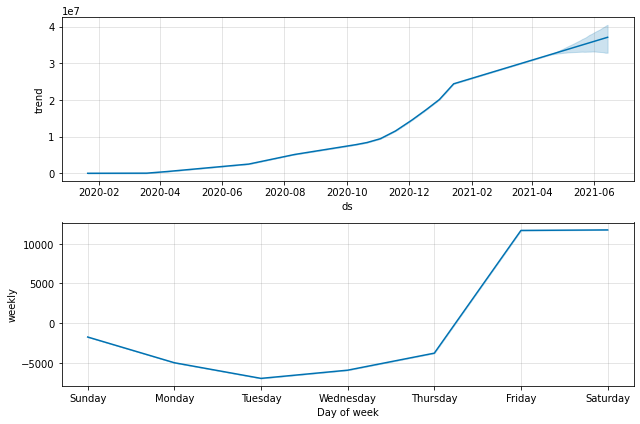

In [ ]:
confirmed_forecast=model.plot_components(forecast)

**Predicting Next 60 days Deaths**

In [ ]:
deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(confirmed['ds'])

In [ ]:
 model_deaths=Prophet(interval_width=0.95)
 model_deaths.fit(deaths)
 Coming_days=model_deaths.make_future_dataframe(periods=60)
 Coming_days.tail()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
506,2021-06-10
507,2021-06-11
508,2021-06-12
509,2021-06-13
510,2021-06-14


In [ ]:
forecast_deaths=model_deaths.predict(Coming_days)
forecast_deaths[["ds","yhat","yhat_lower","yhat_upper"]].round().tail()

,ds,yhat,yhat_lower,yhat_upper
506,2021-06-10,707245.0,654791.0,758719.0
507,2021-06-11,709849.0,660507.0,760165.0
508,2021-06-12,711779.0,656721.0,762943.0
509,2021-06-13,713204.0,662230.0,766796.0
510,2021-06-14,714782.0,660227.0,770478.0


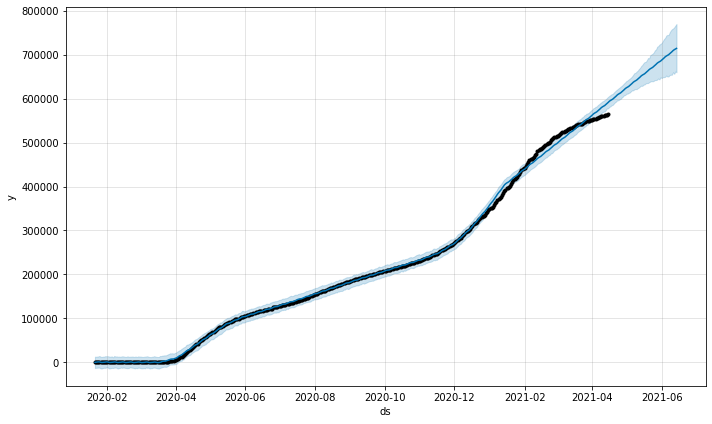

In [ ]:
deaths_plot=model_deaths.plot(forecast_deaths)

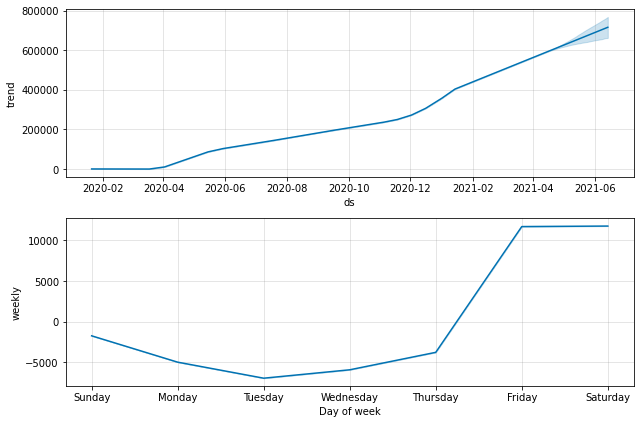

In [ ]:
 death_forecast=model.plot_components(forecast_deaths)

In [ ]:
df_deaths=forecast_deaths[["ds","yhat"]].round()
df_cases=forecast[["ds","yhat"]].round()

In [ ]:
final_predicted_df=pd.merge(df_cases,df_deaths,on='ds')

In [ ]:
final_predicted_df=final_predicted_df[final_predicted_df['ds']>"2021-04-15"]

In [ ]:
final_predicted_df.rename(columns = {'ds':'Date','yhat_x':'Cases','yhat_y':'Deaths'}, inplace = True)

In [ ]:
final_predicted_df=final_predicted_df.reset_index().iloc[:,1:]

In [ ]:
final_predicted_df

,Date,Cases,Deaths
0,2021-04-16,32149190.0,594087.0
1,2021-04-17,32233327.0,596017.0
2,2021-04-18,32303916.0,597442.0
3,2021-04-19,32384752.0,599020.0
4,2021-04-20,32466856.0,601285.0
5,2021-04-21,32551962.0,603695.0
6,2021-04-22,32638180.0,605953.0
7,2021-04-23,32737709.0,608557.0
8,2021-04-24,32821846.0,610487.0
9,2021-04-25,32892434.0,611912.0


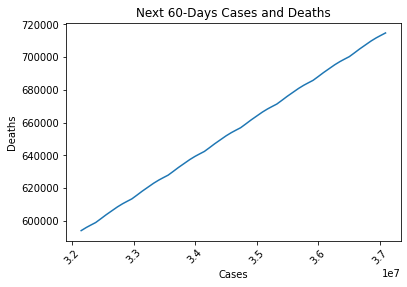

In [ ]:
plt.plot(final_predicted_df["Cases"],final_predicted_df["Deaths"])
plt.title('Next 60-Days Cases and Deaths')
plt.xlabel('Cases')
plt.xticks(rotation = 45)
plt.ylabel('Deaths')
plt.show()

**Cases & Deaths Prediction State-Wide**

In [67]:
states=df["state"].unique()

In [158]:
def state_wise_Cases_prediction(a):
  state_df_cases=df[df["state"]==a][["date","cases"]]
  state_df_cases.columns=['ds','y']
  state_df_cases['ds']=pd.to_datetime(state_df_cases['ds'])
  model_cases_state=Prophet(interval_width=0.95)
  model_cases_state.fit(state_df_cases)
  Coming_days_state_cases=model_cases_state.make_future_dataframe(periods=60)
  forecast_cases_state=model_cases_state.predict(Coming_days_state_cases)
  forecast_cases_state=forecast_cases_state[["ds","yhat","yhat_lower","yhat_upper"]].round()
  forecast_cases_state=forecast_cases_state[forecast_cases_state["ds"]>"2021-04-15"]
  forecast_cases_state.insert(loc = 1,column = 'State',value=a)
  return forecast_cases_state

In [159]:
def state_wise_Deaths_prediction(a):
  state_df=df[df["state"]==a][["date","deaths"]]
  state_df.columns=['ds','y']
  state_df['ds']=pd.to_datetime(state_df['ds'])
  model_deaths_state=Prophet(interval_width=0.95)
  model_deaths_state.fit(state_df)
  Coming_days_state=model_deaths_state.make_future_dataframe(periods=60)
  forecast_deaths_state=model_deaths_state.predict(Coming_days_state)
  forecast_deaths_state=forecast_deaths_state[["ds","yhat","yhat_lower","yhat_upper"]].round()
  forecast_deaths_state=forecast_deaths_state[forecast_deaths_state["ds"]>"2021-04-15"]
  forecast_deaths_state.insert(loc = 1,column = 'State',value=a)
  return forecast_deaths_state

In [185]:
def final(cases,Deaths):
  cases=cases[["ds","State","yhat"]]
  Deaths=Deaths[["ds","yhat"]]
  final_df=pd.merge(cases,Deaths,on='ds')
  final_df.rename(columns = {'ds':'Date','yhat_x':'Cases','yhat_y':'Deaths'}, inplace = True)
  return final_df

In [202]:
state_input=str(input("Enter State"))
cases=state_wise_Cases_prediction(state_input)
Deaths=state_wise_Deaths_prediction(state_input)
final_df=final(cases,Deaths)
final_df.head()

Enter StateNew York


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Date,State,Cases,Deaths
0,2021-04-16,New York,1999425.0,51857.0
1,2021-04-17,New York,2007781.0,51960.0
2,2021-04-18,New York,2015273.0,52067.0
3,2021-04-19,New York,2022340.0,52162.0
4,2021-04-20,New York,2029552.0,52281.0


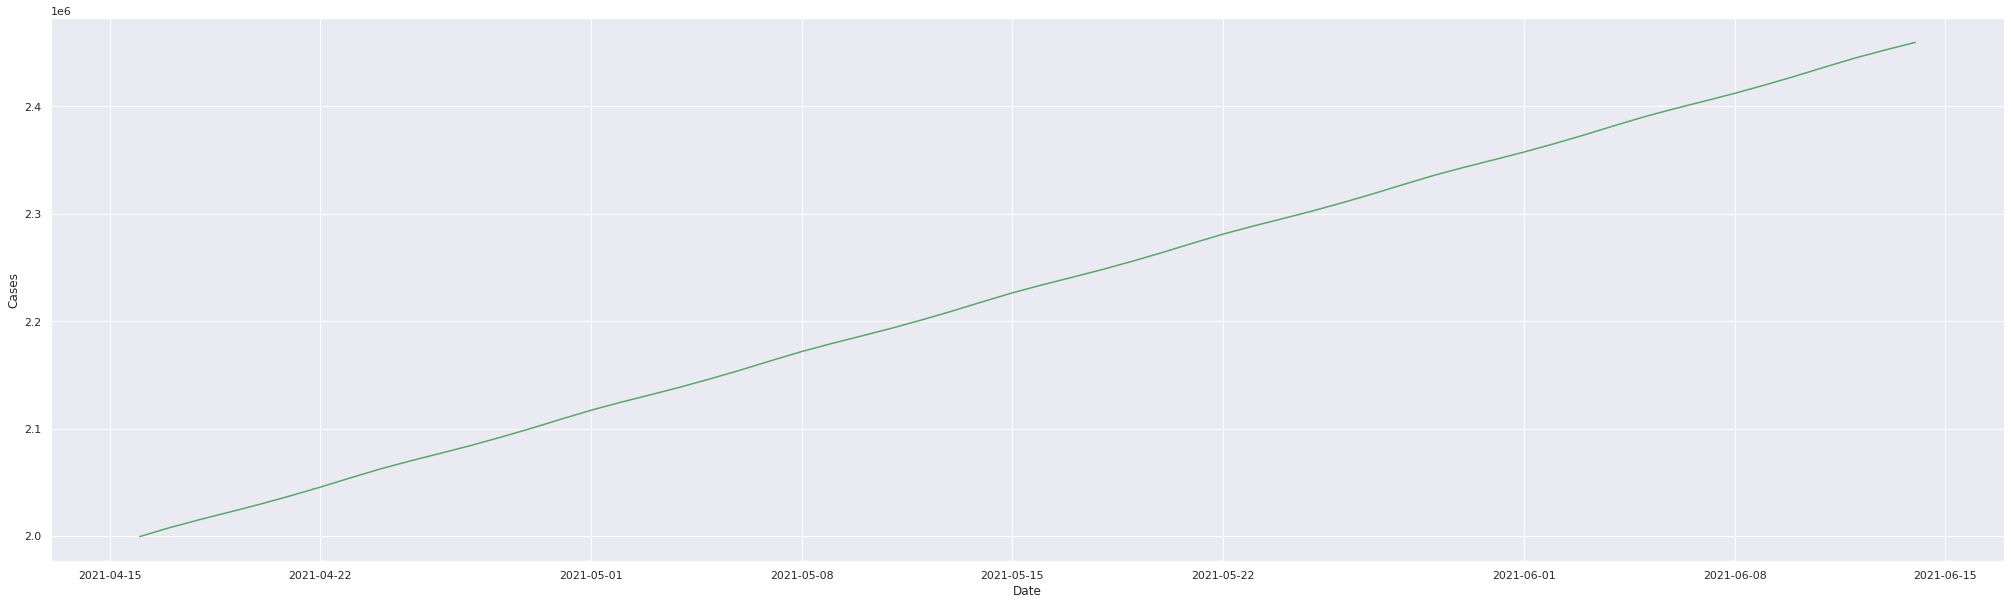

In [208]:
sns.set(rc={'figure.figsize':(35,10)})
sns.lineplot(x="Date",y="Cases",data=final_df,color='g')

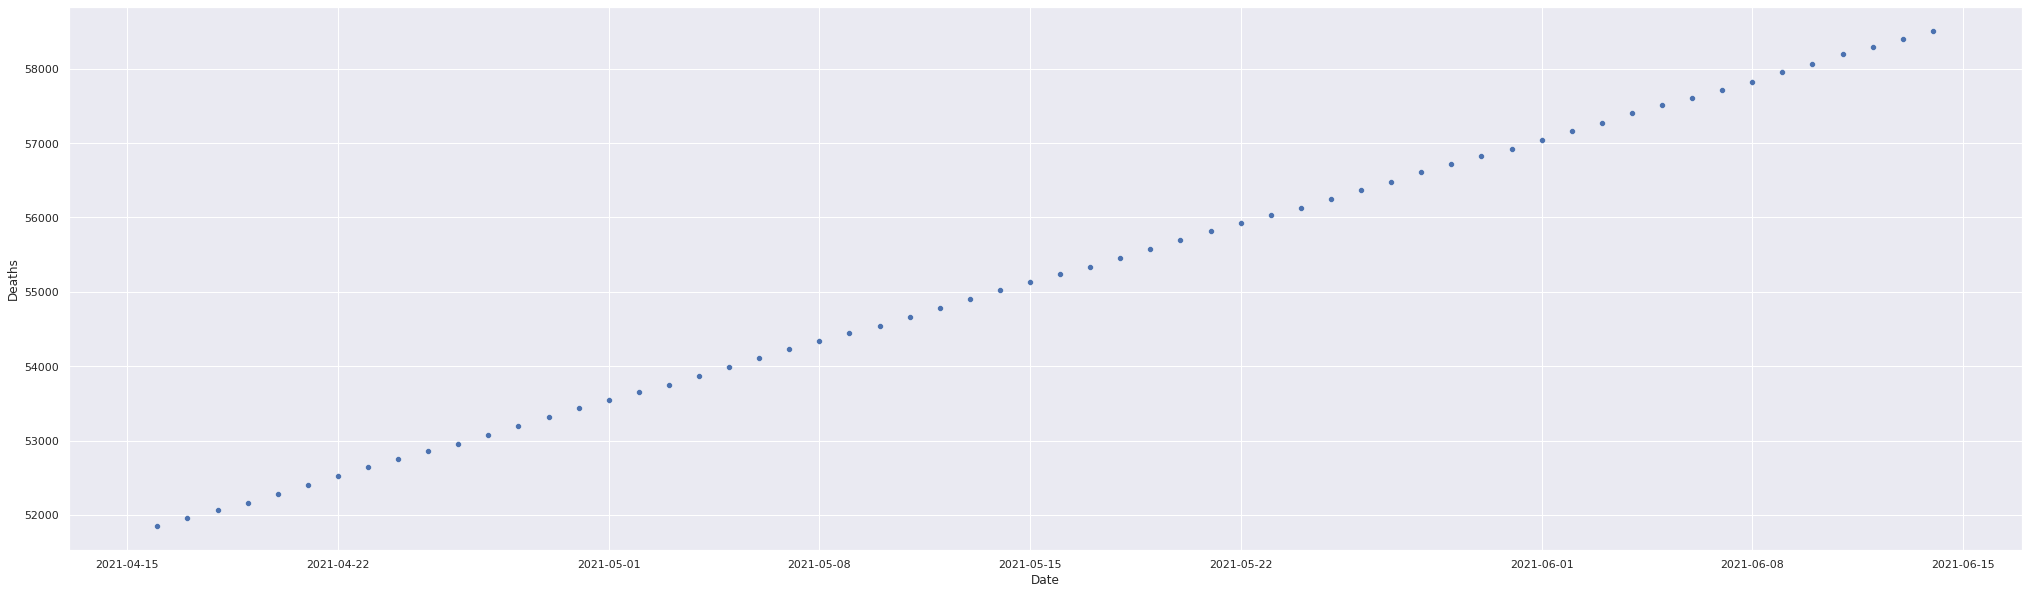

In [218]:
sns.scatterplot(x="Date",y="Deaths",data=final_df,color='b')